In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

**Image Loading**

array([[[149, 198, 255],
        [149, 198, 255],
        [149, 198, 255],
        ...,
        [106, 180, 251],
        [106, 180, 251],
        [105, 179, 250]],

       [[149, 198, 255],
        [149, 198, 255],
        [149, 198, 255],
        ...,
        [106, 180, 251],
        [106, 180, 251],
        [108, 182, 253]],

       [[149, 198, 255],
        [149, 198, 255],
        [149, 198, 255],
        ...,
        [106, 180, 251],
        [106, 180, 251],
        [109, 183, 254]],

       ...,

       [[  8,  19,   2],
        [  6,  18,   0],
        [  4,  16,   0],
        ...,
        [ 18,  26,   5],
        [  9,  16,   0],
        [ 13,  19,   5]],

       [[  4,  15,   0],
        [  7,  18,   2],
        [  7,  18,   2],
        ...,
        [ 17,  25,   4],
        [ 10,  17,   1],
        [ 11,  17,   3]],

       [[  4,  15,   1],
        [  7,  18,   4],
        [  7,  18,   2],
        ...,
        [ 17,  25,   4],
        [ 10,  17,   1],
        [ 11,  17,   3]]], dtype=uint8)
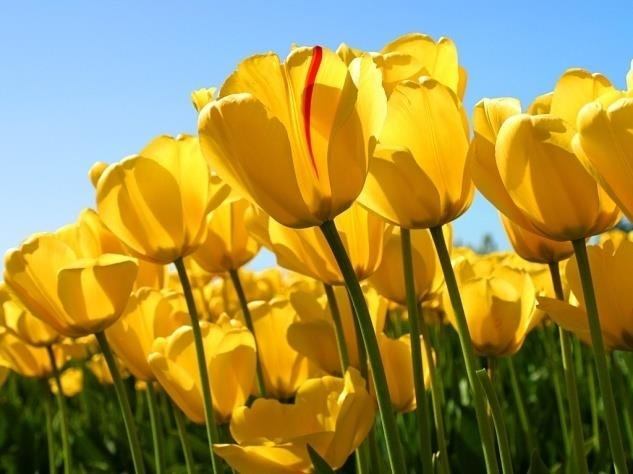

In [6]:
img = cv2.imread("Edge-Detection-Sample-Input-and-Output-Images.jpeg") #https://www.researchgate.net/figure/Edge-Detection-Sample-Input-and-Output-Images_fig5_327134322
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb

array([[190, 190, 190, ..., 166, 166, 165],
       [190, 190, 190, ..., 166, 166, 168],
       [190, 190, 190, ..., 166, 166, 169],
       ...,
       [ 14,  12,  11, ...,  21,  12,  16],
       [ 10,  13,  13, ...,  20,  13,  14],
       [ 10,  13,  13, ...,  20,  13,  14]], dtype=uint8)
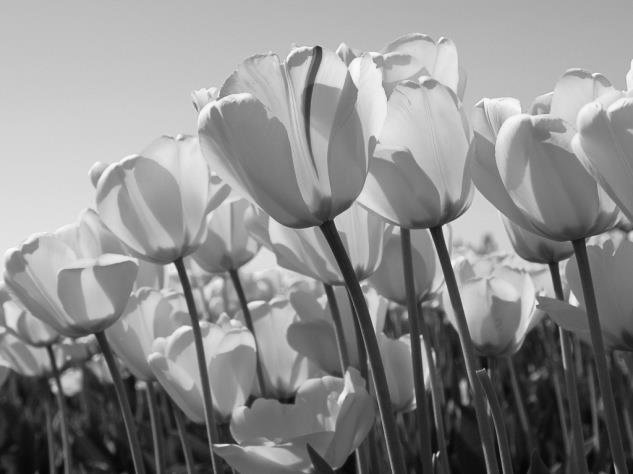

In [7]:
grayScale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayScale

**Sobel Edge Detection**

In [8]:
sobel_x= np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [9]:
sobel_y= np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])
sobel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [10]:
def convolution(image, kernel):                                                 #defined function for ease in each method
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
    output = np.zeros(image.shape)
    for y in range(image_row-kernel_row):
        for x in range(image_col-kernel_col):
            output[y,x] = (kernel*image[y:y+kernel_row, x:x+kernel_col]).sum()
    return output

In [11]:
sobel_gx=convolution(grayScale, sobel_x)
sobel_gy=convolution(grayScale, sobel_y)

In [12]:
sobel_g= np.sqrt(sobel_gx**2+sobel_gy**2)      #magnitude of sobel_gx and sobel_gy

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

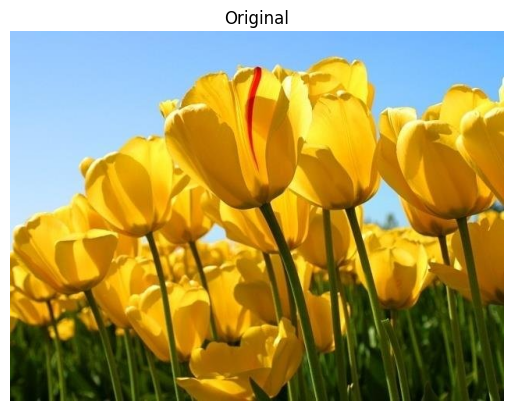

In [13]:
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

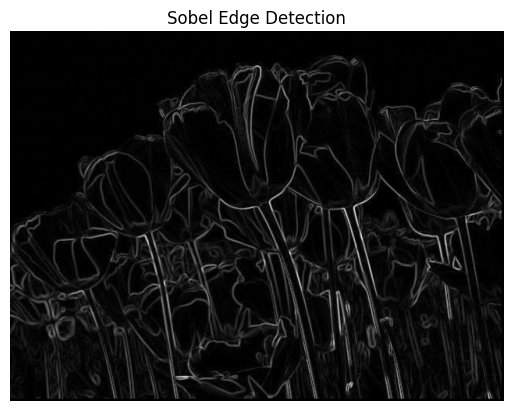

In [14]:
plt.title('Sobel Edge Detection')
plt.imshow(sobel_g, cmap='gray')
plt.axis('off')

**Scharr Edge Detection**

In [15]:
scharr_x= np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
scharr_x

array([[ -3,   0,   3],
       [-10,   0,  10],
       [ -3,   0,   3]])

In [16]:
scharr_y=np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
scharr_y

array([[ -3, -10,  -3],
       [  0,   0,   0],
       [  3,  10,   3]])

In [17]:
scharr_gx=convolution(grayScale, scharr_x)
scharr_gy=convolution(grayScale, scharr_y)

In [18]:
scharr_g=np.sqrt(scharr_gx**2+scharr_gy**2)             #magnitude of scharr_gx and scharr_gy

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

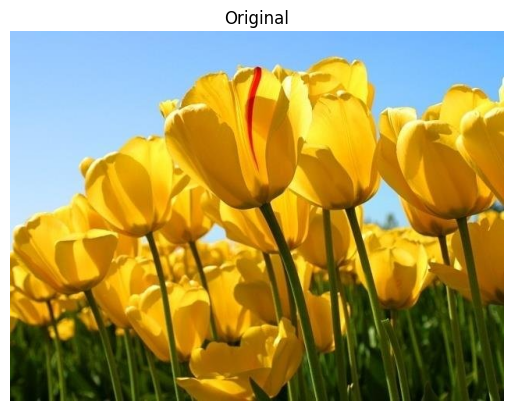

In [19]:
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

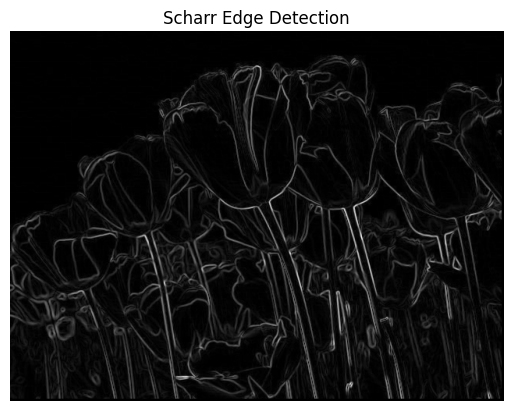

In [20]:
plt.title('Scharr Edge Detection')
plt.imshow(scharr_g, cmap='gray')
plt.axis('off')

**Canny Edge Detection**

array([[190, 190, 190, ..., 166, 166, 166],
       [190, 190, 190, ..., 166, 166, 167],
       [190, 190, 190, ..., 166, 166, 167],
       ...,
       [ 14,  13,  13, ...,  17,  16,  15],
       [ 12,  12,  12, ...,  16,  15,  14],
       [ 12,  12,  12, ...,  16,  15,  14]], dtype=uint8)
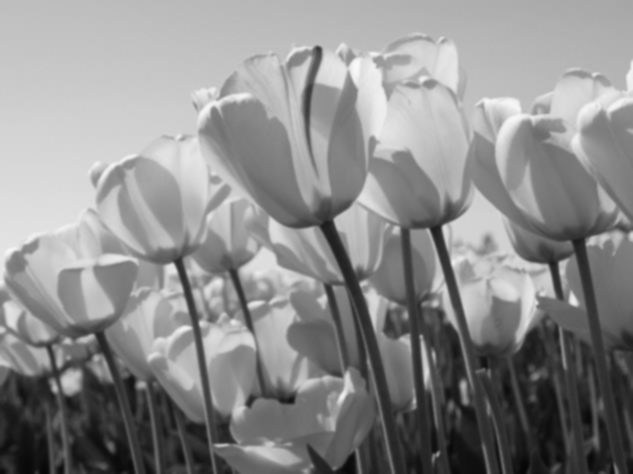

In [21]:
blurred= cv2.GaussianBlur(grayScale, (5,5), 0)                                  #applying gaussian blur of canny edge
blurred

In [22]:
canny_x= convolution(blurred, sobel_x)
canny_y= convolution(blurred, sobel_y)

In [23]:
canny_g= np.sqrt(canny_x**2+canny_y**2)                                     #magnitude of canny_gx and canny_gy
theta= np.arctan2(canny_y, canny_x)                                         #gradient direction

Defining functions for non max, threshold and hysteresis



In [24]:
def non_max_suppression(G, theta):
    M, N = G.shape
    Z = np.zeros((M, N), dtype=np.float32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            # 0°
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = G[i, j+1]
                r = G[i, j-1]
            # 45°
            elif (22.5 <= angle[i,j] < 67.5):
                q = G[i+1, j-1]
                r = G[i-1, j+1]
            # 90°
            elif (67.5 <= angle[i,j] < 112.5):
                q = G[i+1, j]
                r = G[i-1, j]
            # 135°
            elif (112.5 <= angle[i,j] < 157.5):
                q = G[i-1, j-1]
                r = G[i+1, j+1]

            if (G[i,j] >= q) and (G[i,j] >= r):
                Z[i,j] = G[i,j]
            else:
                Z[i,j] = 0
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.15):
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)

    strong = np.uint8(255)
    weak = np.uint8(25)

    strong_i, strong_j = np.where(img >= highThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res, weak, strong

def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i,j] == weak:
                if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                    or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                    or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                    img[i,j] = strong
                else:
                    img[i,j] = 0
    return img

In [25]:
non_max= non_max_suppression(canny_g, theta)                                    #applying non-max, thresholding and hysteresis on canny_g
thresholded, weak, strong= threshold(non_max)
hysteresis_img= hysteresis(thresholded, weak, strong)

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

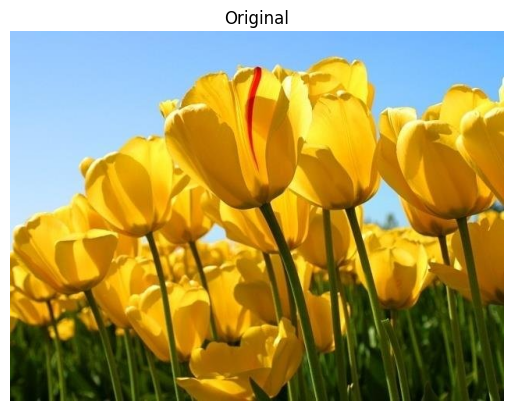

In [26]:
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(632.5), np.float64(473.5), np.float64(-0.5))

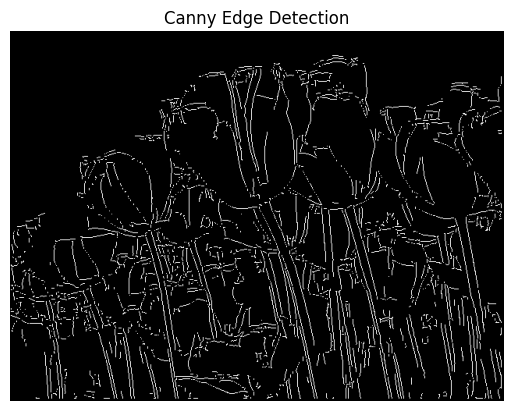

In [27]:
plt.title('Canny Edge Detection')
plt.imshow(hysteresis_img, cmap='gray')
plt.axis('off')

**Comparing Results**

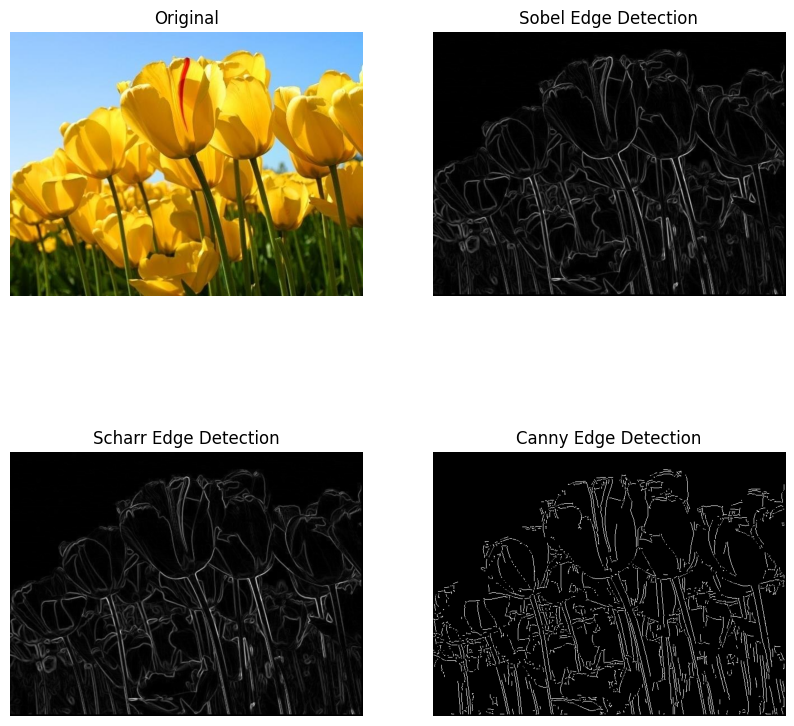

In [28]:
plt.figure(figsize=(10,10))                                                     #comparing results for all the methods
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_g, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.title('Scharr Edge Detection')
plt.imshow(scharr_g, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.title('Canny Edge Detection')
plt.imshow(hysteresis_img, cmap='gray')
plt.axis('off')
plt.show()